# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [ ]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()
X = faces.data
y = faces.target
print(X.data.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)


## Actividad en clase

Vamos a visualizar este dataset usando **t-SNE** y **UMAP**. Para esto haga lo siguiente:

- Aplique min-max scaler al dataset.
- Transforme el dataset con PCA para retener el 95% de la varianza.
- Sobre el dataset, construya una proyección **t-SNE**. Justifique la elección de parámetros.
- Visualice su proyección usando los códigos vistos en clase. Modifíquelos para que funcionen sobre este dataset.
- Sobre el dataset, construya una proyección **UMAP**. Justifique la elección de parámetros.
- Visualice su proyección usando los códigos vistos en clase.
- ¿Qué puede identificar en estas visualizaciones?
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que las L otorgan un bono en la nota final de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***

### Aplicamos MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

### Descomponemos a 400

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=400)
pca.fit(X)

PCA(n_components=400)

### Calculamos cuántas componentes retienen el 95% de la varianza

In [ ]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i


## Calculamos las compoenntes para retener el 90% de la varianza del dataset original
min_var(0.95,pca.explained_variance_ratio_)

121

### Proyectamos usando PCA a k = 121

In [ ]:
pca = PCA(n_components=121)
X_= pca.fit_transform(X)

### Voy a modificar el codigo para dibujar. Lo más importante es usar los target_names, que en este caso son los IDs de las personas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import offsetbox

faces['target_names'] = np.unique(faces.target) # esto es nuevo

def plot_face_embedding(X, title):
    _, ax = plt.subplots(figsize=(12, 12))
    X = MinMaxScaler().fit_transform(X)

    for face in faces.target_names: # aquí los uso
        ax.scatter(
            *X[y == face].T,
            marker=f"${face}$", # en lugar de usar digit uso face (ID)
            color=plt.cm.Dark2(face),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every face on the embedding
        # show an annotation box for a group of faces
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 9e-3:   # aquí hay que calibrar!!!
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(faces.images[i], cmap=plt.cm.gray_r), X[i]
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

### Como hay diez ejemplos por clase, voy a usar ese valor para perplexity

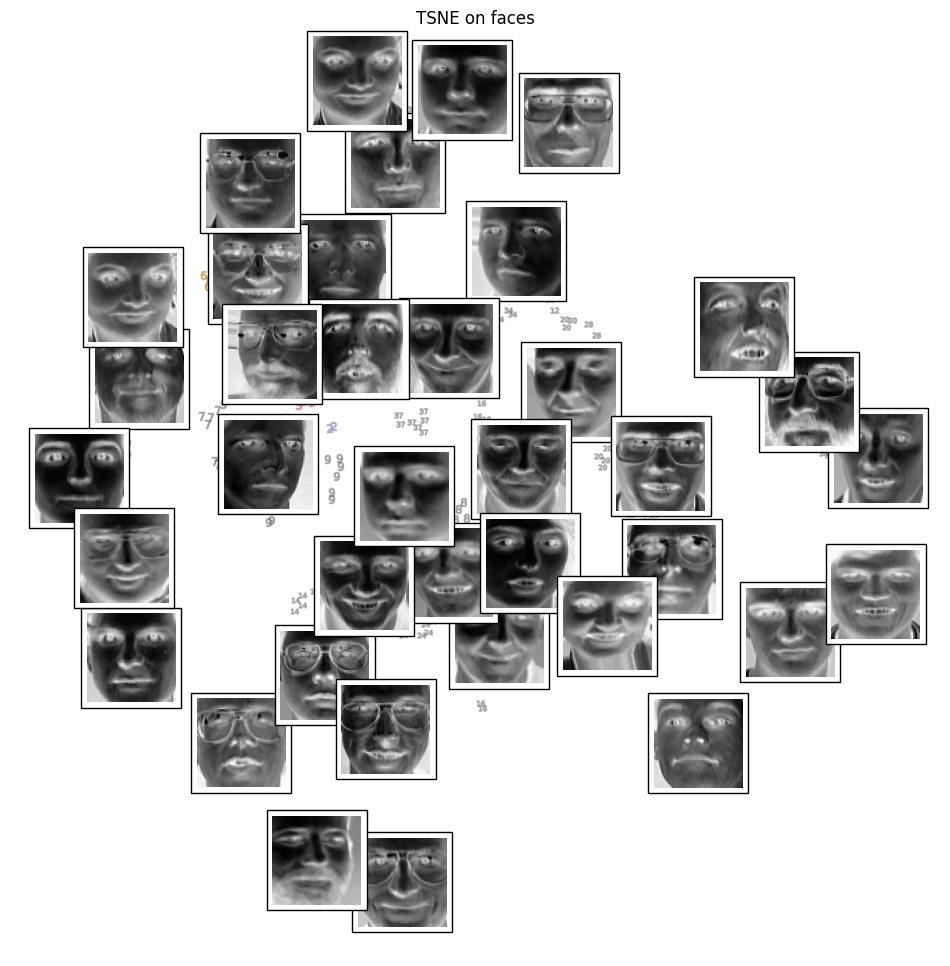

In [ ]:
from sklearn.manifold import TSNE

tsne_embed_faces = TSNE(n_components=2, perplexity = 10, n_iter=5000, n_iter_without_progress=150, n_jobs=10)
projection = tsne_embed_faces.fit_transform(X, y)
plot_face_embedding(projection, 'TSNE on faces')
plt.show()

### Lo mismo para n_neighbors. Uso el valor esperado de ejemplos de la misma clase. En cuanto a min_dist, debe calibrarlo.

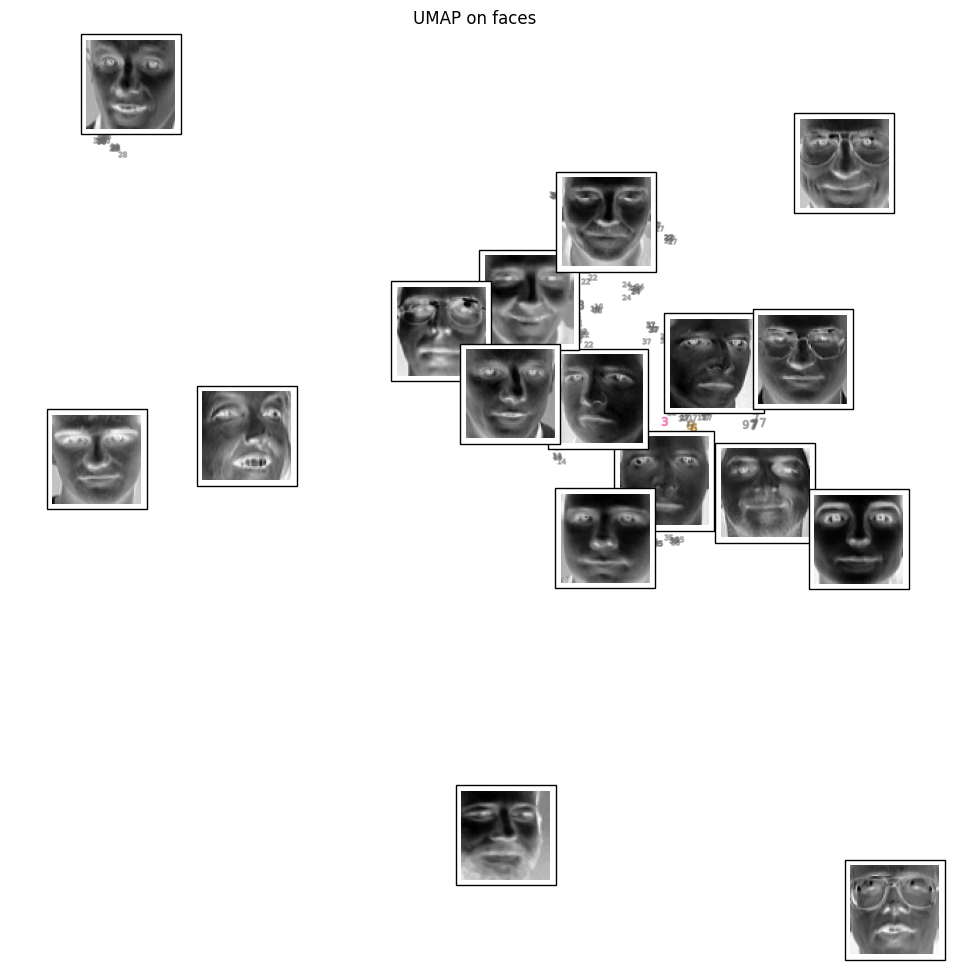

In [ ]:
import umap.umap_ as umap

umap_2d = umap.UMAP(n_components = 2, min_dist = 0.05, n_neighbors= 10)#, n_jobs=10)
projection = umap_2d.fit_transform(X)
plot_face_embedding(projection, 'UMAP on faces')
plt.show()

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=fab5c987247311311d4ebdaa14ef8483cb5a06b4cc9b5182ac1aa8df8efcaf10
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=8507d457264487a372752358fa58f44aeba7149d489ccb08177545762c1b796c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
